In [100]:
import warnings; warnings.filterwarnings("ignore")
import numpy as np; import scipy as sp; import pandas as pd
import matplotlib.pyplot as plt
import mne; mne.utils.set_log_level('error')
from functools import reduce
from time import time
import local
from models.preprocessing import utils
from joblib import Parallel, delayed
from pickle import dump

In [102]:
d="../../data/reinhartlab/multimodal/cg/Epochs/"
ext=".csv"
box=utils.select_dataset(d,ext);box

In [109]:
def get_trial_pos_in_block(block_type,block_index,df,pos=None):
    pos = np.zeros_like(df.BlockType)*0.
    mask = np.logical_and(df.BlockType==block_type,df.BlockIndex==block_index)
    pos[mask] = (np.arange(np.sum(mask))+1)/np.sum(mask)
    return pos
def load_and_tag(subject):
    df = pd.read_csv(d+subject+ext)
    df['BlockPosition']=np.sum([get_trial_pos_in_block(a,b,df) for a,b in zip(['visual/right','visual/right','visual/left','visual/left','auditive/right','auditive/right','auditive/left','auditive/left'],[1,2,1,2,1,2,1,2])],axis=0)
    df['Subject']=np.array([subject.split('.')[0]]*len(df))
    return df

In [110]:
df = pd.concat([load_and_tag(subject) for subject in utils.get_selection(box) if 'stimulus' in subject])

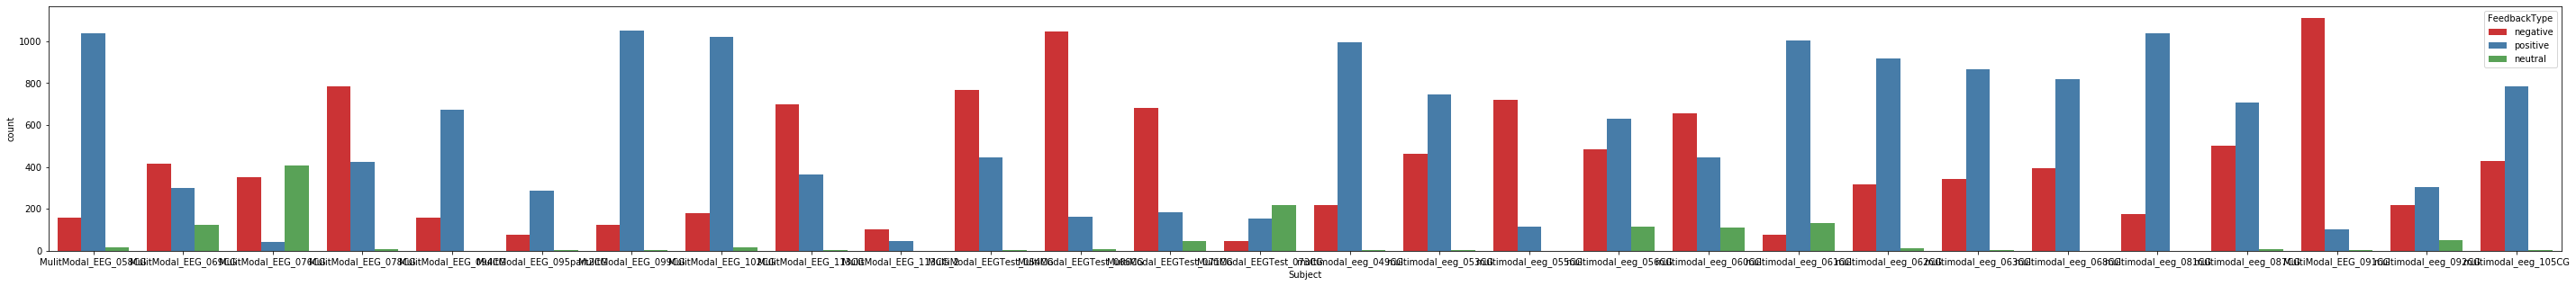

In [123]:
fig,ax = plt.subplots(1,1,figsize=(50,5))
sb.countplot(x='Subject',hue='FeedbackType',data=df,ax=ax,palette='Set1');

Red are incorrect responses, blue are correct responses and green are trials without response. The dataset overview suggests the need to filter out subjects with apparent lack of engagement, e.g. 91CG (3rd from the right).